In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.special as poly
from math import factorial

In [74]:
numsteps = 1000
burnin = 100
dof = 4
n = 100 + 1
totsteps = 25000
savesteps = 100
completedata = np.zeros(numsteps)
mmat = np.zeros((dof, dof))
rvec = np.zeros(dof)
ft = 10.0
ic = np.array([1.0])
it = np.array([0.0])

h = 0.001
h12 = np.sqrt(h)
g = 0.5
coef = np.array([1., 2., -1., -0.5])

In [75]:
def drift(x, theta):
    return (np.dot(mypoly(x), theta))

In [76]:
def mypoly(x):
    y = np.zeros((x.size, dof))
    for i in range(x.size):
        for j in range(dof):
            H = poly.hermitenorm(j)
            y[i,j] = H(x[i]) / (np.sqrt(2 * np.pi) * factorial(j))
    return y

In [77]:
traj = ic
j = 1
dt = ft / savesteps
t = np.arange(0, ft + dt, dt)
x = np.zeros(t.size)

for i in range(1, totsteps + 1):
    traj = traj + drift(traj, coef) * dt # + g * np.sqrt(dt) * np.random.rand(1)
    if ((i % (totsteps/savesteps)) == 0):
        x[j] = traj
        print(j, x[j])
        j = j + 1
# x = np.concatenate((ic, x))
# t = np.concatenate((it, t))

1 3.28792081527
2 3.42096420826
3 3.423214465
4 3.42325083133
5 3.4232514186
6 3.42325142809
7 3.42325142824
8 3.42325142824
9 3.42325142824
10 3.42325142824
11 3.42325142824
12 3.42325142824
13 3.42325142824
14 3.42325142824
15 3.42325142824
16 3.42325142824
17 3.42325142824
18 3.42325142824
19 3.42325142824
20 3.42325142824
21 3.42325142824
22 3.42325142824
23 3.42325142824
24 3.42325142824
25 3.42325142824
26 3.42325142824
27 3.42325142824
28 3.42325142824
29 3.42325142824
30 3.42325142824
31 3.42325142824
32 3.42325142824
33 3.42325142824
34 3.42325142824
35 3.42325142824
36 3.42325142824
37 3.42325142824
38 3.42325142824
39 3.42325142824
40 3.42325142824
41 3.42325142824
42 3.42325142824
43 3.42325142824
44 3.42325142824
45 3.42325142824
46 3.42325142824
47 3.42325142824
48 3.42325142824
49 3.42325142824
50 3.42325142824
51 3.42325142824
52 3.42325142824
53 3.42325142824
54 3.42325142824
55 3.42325142824
56 3.42325142824
57 3.42325142824
58 3.42325142824
59 3.42325142824
60 3.4232

In [65]:
dt = ft / savesteps
t = np.arange(0, ft + dt, dt)

print(t)

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]


[ 0.          3.28792082  3.42096421  3.42321447  3.42325083  3.42325142
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143  3.42325143
  3.42325143  3.42325143  3.42325143  3.42325143  3

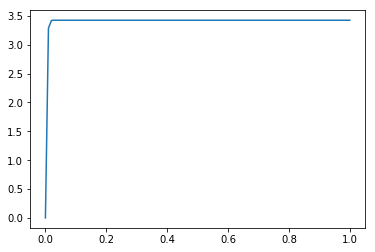

In [78]:
plt.plot(t, x)
print(x)
print(t)

In [8]:
def brownianbridge(xin, tin, n):
    h = (tin[1]-tin[0])/n
    tvec = tin[0] + (1+np.arange(n))*h
    h12 = np.sqrt(h)
    wincs = np.random.normal(scale=h12, size=n)
    w = np.cumsum(wincs)
    bridge = xin[0] + w - ((tvec - tin[0])/(tin[1]-tin[0]))*(w[n-1] + xin[0] - xin[1])
    return tvec, bridge

/home/shagun/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

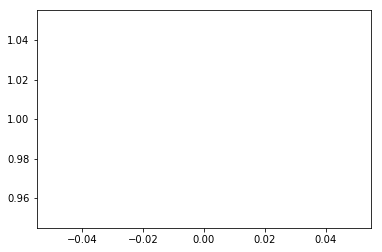

In [9]:
tout, bout = brownianbridge(x,t,1000)
tout = np.concatenate((t[[0]],tout))
bout = np.concatenate((x[[0]],bout))
plt.plot(tout,bout)
tout

In [10]:
theta = np.array([1., 1., -1., -0.25])

In [11]:
# girsanov LOG likelihood
def girsanov(path, dt, theta):
    b = drift(path, theta)
    int1 = np.dot(b[:-1], np.diff(path))
    b2 = np.square(b)
    int2 = np.sum(0.5*(b2[1:] + b2[:-1]))*dt
    r = int1 - 0.5*int2
    return r

In [12]:
done = 0
mytol = 10**(-3)
numiter = 0
while (done == 0):
    numiter = numiter + 1
    print(numiter)
    tout, xcur = brownianbridge(x,t,1000)
    oldlik = girsanov(path=xcur, dt=h, theta=theta)

    for jj in range(numsteps + burnin):
        _, prop = brownianbridge(x,t,1000)
        proplik = girsanov(path=prop, dt=h, theta=theta)
        rho = np.exp(proplik - oldlik)
        if (rho > np.random.uniform()):
            xcur = prop
            oldlik = proplik
        # ignore samples during burnin phase
        if (jj > burnin):
            pp = mypoly(xcur[:(-1)])
            mmat = mmat + h * np.matmul(pp.T, pp) / numsteps
            rvec = rvec + np.matmul((np.diff(xcur)).T, pp) / numsteps

    newtheta = np.linalg.solve(mmat, rvec)
    check = np.sum(np.abs(newtheta - theta))
    if (check < mytol):
        print("finished!")
        print(check)
        print(theta)
        done = 1
    theta = newtheta
    print(check)
    print(theta)

1


/home/shagun/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 